# Diabetes Study in Machine Learning

## This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


![Diabetes](https://cdn1.medicalnewstoday.com/content/images/articles/321/321097/a-doctor-writing-the-word-diabetes.jpg)

## CONTENT :

### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


<b><i> Pregnancies:</b> Number of times pregnant</i><br>
<b><i> Glucose:</b> Plasma glucose concentration a 2 hours in an oral glucose tolerance test</i><br>
<b><i> BloodPressure:</b> Diastolic blood pressure (mm Hg)</i><br>
<b><i> SkinThickness: </b>Triceps skin fold thickness (mm)</i><br>
<b><i> Insulin:</b> 2 Hour serum insulin (mu U/ml)</i><br>
<b><i> BMI: </b>Body mass index (weight in kg/(height in m)^2)</i><br>
<b><i> DiabetesPedigreeFunction:</b> Diabetes pedigree function</i><br>
<b><i> Age: </b>Age (years)</i><br>
<b><i> Outcome:</b> Class variable (0 or 1) 268 of 768 are 1, the others are 0</i><br>



## PROBLEM STATEMENT :

### Can you build a machine learning model to accurately predict whether or not a patient have diabetes or not?

In [1]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
diabetes = pd.read_csv('/Users/swaruptripathy/Desktop/Data Science and AI/datasets/diabetes_new.csv')
diabetes.shape

(768, 9)

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         761 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

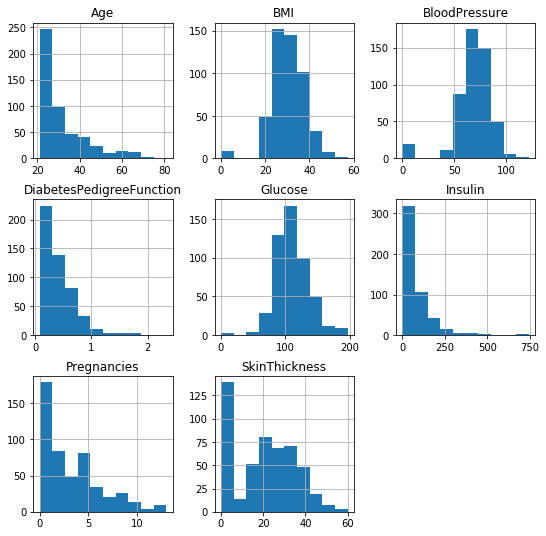

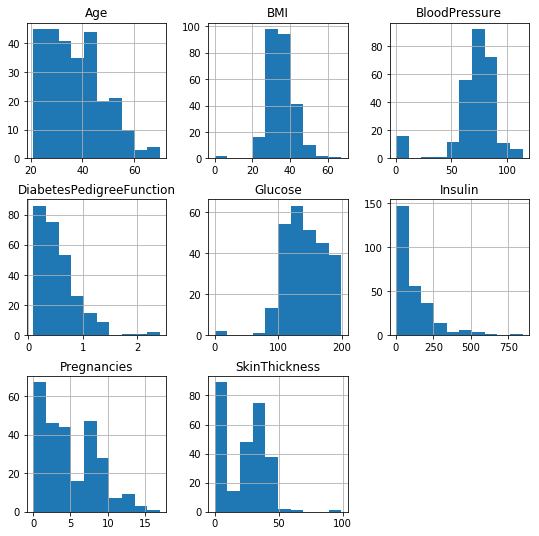

In [6]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

## Missing value Visualization

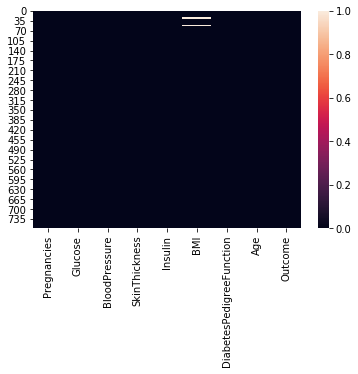

In [7]:
sb.heatmap(diabetes.isnull())

## Populate data in X ( Independent Variable) and y ( Dependent Variable)

In [8]:
X = diabetes.iloc[:, :-1].values
y = diabetes.iloc[:, 8].values

## Missing Value Imputation

In [9]:
#Impute missing value using sklearn imputer from preprocessing
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(X[:,5:6])
X[:,5:6] = imputer.transform(X[:,5:6])

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
diabetes['BMI'] = X[:,5:6]

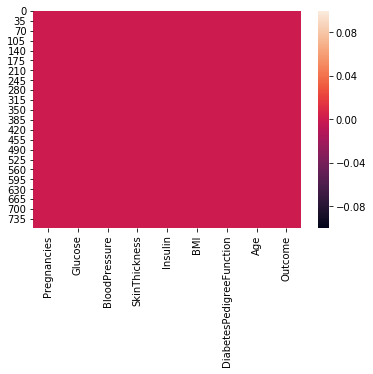

In [11]:
sb.heatmap(diabetes.isnull())

In [12]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


## “Outcome” is the feature we are going to predict, 0 means No diabetes, 1 means diabetes. Of these 768 data points, 500 are labeled as 0 and 268 as 1:

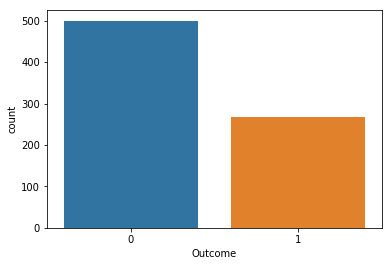

In [13]:
import seaborn as sb
sb.countplot(diabetes['Outcome'],label="Count")

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], 
                                                    diabetes['Outcome'], test_size = 0.01, random_state = 66)

In [15]:
## Records kept for testing
pd.concat((X_test,y_test), axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
149,2,90,70,17,0,27.3,0.085,22,0
416,1,97,68,21,0,27.2,1.095,22,0
275,2,100,70,52,57,40.5,0.677,25,0
742,1,109,58,18,116,28.5,0.219,22,0
145,0,102,75,23,0,0.0,0.572,21,0
178,5,143,78,0,0,45.0,0.190,47,0
712,10,129,62,36,0,41.2,0.441,38,1
501,3,84,72,32,0,37.2,0.267,28,0


## Train the machine learning model (RAndom Forest) using train data

In [31]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rclf=RandomForestClassifier(n_estimators=100)
rclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Making Predictions on test data

In [32]:
y_pred = rclf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0])

## Accuracy Score

In [33]:
accuracy_rf = rclf.score(X_test, y_test)
print("Accuracy of Random Forest on test set:",accuracy_rf)

Accuracy of Random Forest on test set: 0.875


## New Patient data prediction having Diabetes


<b> Pregnancies:</b> 1<br>
<b> Glucose:</b> 118<br>
<b> BloodPressure:</b> 68<br>
<b> SkinThickness: </b> 23<br>
<b> Insulin:</b> 0<br>
<b> BMI: </b> 42<br>
<b> DiabetesPedigreeFunction:</b> 1.09<br>
<b> Age: </b>45<br>

In [34]:
rclf.predict([[1,118,68,23,0,42,1.09,45]])

array([1])

## New Patient data prediction not having Diabetes

<b> Pregnancies:</b> 0<br>
<b> Glucose:</b> 118<br>
<b> BloodPressure:</b> 52<br>
<b> SkinThickness: </b> 32<br>
<b> Insulin:</b> 100<br>
<b> BMI: </b> 30<br>
<b> DiabetesPedigreeFunction:</b> 0.23<br>
<b> Age: </b>24<br>

In [35]:
rclf.predict([[0,118,52,32,100,30,0.23,24]])

array([0])

## Model Evaluation

In [36]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[6 1]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.50      1.00      0.67         1

   micro avg       0.88      0.88      0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



## Feature Importance

In [37]:
# Create a list of feature names
feat_labels = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Pregnancies', 0.08264609131659205)
('Glucose', 0.26130819606909556)
('BloodPressure', 0.09087670140507534)
('SkinThickness', 0.07060493486243793)
('Insulin', 0.0718329037561008)
('BMI', 0.1595520926218609)
('DiabetesPedigreeFunction', 0.1266960501554677)
('Age', 0.13648302981336954)


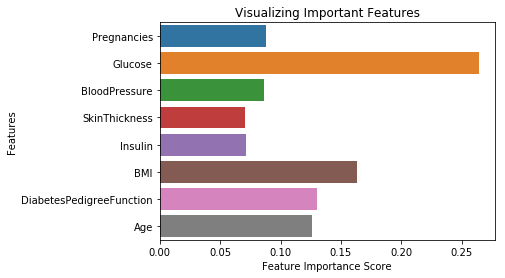

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=rclf.feature_importances_, y=feat_labels)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Data training using k-NN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

### Accuracy of k-NN Algorithm

In [25]:
accuracy_knn = knn.score(X_test, y_test)
print('Accuracy of K-NN classifier on test set: ', accuracy_knn)

Accuracy of K-NN classifier on test set:  0.75


## Data training using Support Vector Machine

In [26]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Accuracy of SVM Algorithm

In [27]:
accuracy_svm = svclassifier.score(X_test, y_test)  
accuracy_svm

0.875

## Final Confidence results

In [28]:
results={'Accuracy':[accuracy_svm,accuracy_knn,accuracy_rf]}
columns=['SVM','kNN','Random Forest']
aov_table=pd.DataFrame(results,columns)
aov_table

,Accuracy
SVM,0.875
kNN,0.750
Random Forest,0.875


## ROC Curve

### AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

In [29]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score  

In [30]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [48]:
probs = clf.predict_proba(X_test)  
probs

array([[0.97, 0.03],
       [0.93, 0.07],
       [0.81, 0.19],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.31, 0.69],
       [0.39, 0.61],
       [0.87, 0.13]])

In [49]:
probs = probs[:, 1]  
probs

array([0.03, 0.07, 0.19, 0.03, 0.04, 0.69, 0.61, 0.13])

In [50]:
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc)  

AUC: 0.86


In [51]:
fpr, tpr = roc_curve(y_test, probs)  

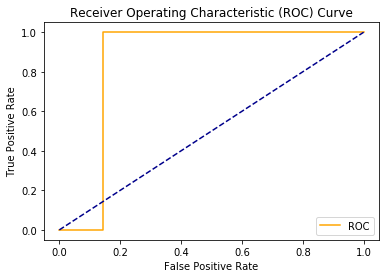

In [52]:
plot_roc_curve(fpr, tpr)  